In [1]:
import shapely
import geopandas as gpd
import numpy as np
import pandas as pd
import pathlib
import rasterio

import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import matplotlib.patches as patches

In [2]:
extent = gpd.read_file("C:/Users/hemert/data/vcl/dataset/testbeeld-extent.geojson").to_crs(epsg=28992).iloc[0].geometry
sat_img_file = pathlib.Path("C:/Users/hemert/data/vcl/dataset/test3.tif")

In [3]:
bounds = shapely.bounds(extent)
minx = bounds[0]
miny = bounds[1]
maxx = bounds[2]
maxy = bounds[3]

plt_extent = rasterio.open(sat_img_file).bounds
plt_extent = (plt_extent[0], plt_extent[2], plt_extent[1], plt_extent[3])

mid_point = extent.centroid.coords[0]
mid_point

(153892.62777994972, 601295.7817996114)

In [4]:
coords = list(extent.exterior.coords)
coords = pd.DataFrame(coords)
coords.columns = ['x', 'y']

xmin = coords.idxmin(0)['x']
ymin = coords.idxmin(0)['y']
xmax = coords.idxmax(0)['x']
ymax = coords.idxmax(0)['y']

In [5]:
# Find bottom left point and bottom right point of original extent
bottom_point = [coords.iloc[ymin]['x'], coords.iloc[ymin]['y']]
right_point = [coords.iloc[xmax]['x'], coords.iloc[xmax]['y']]

# Compute the rotation angle of original extent
o = right_point[1] - bottom_point[1]
a = right_point[0] - bottom_point[0]

angle_1 = np.rad2deg(np.arctan(o/a))

In [6]:
# Open top view of Terschelling an transpose to (H, W, C)
sat = rasterio.open(sat_img_file).read()
sat = np.transpose(sat, (1, 2, 0))

# Rotate original extent s.t. it has a 'straight' orientation
extent_rotated = extent = shapely.affinity.rotate(extent, -angle_1)

[]

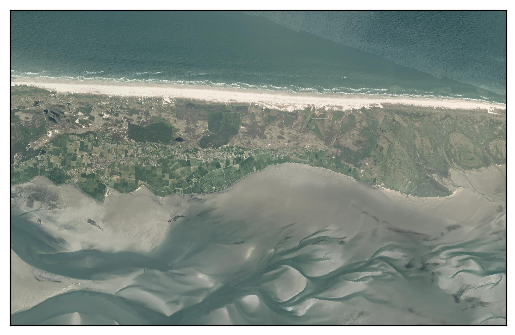

In [7]:
fig, ax = plt.subplots()
im = ax.imshow(sat, interpolation='none',
                   extent=plt_extent, clip_on=True
                  )

# Rotate image (and clip, due to clip_on=True)
transform = mtransforms.Affine2D().rotate_deg_around(mid_point[0], mid_point[1], -angle_1)
trans_data = transform + ax.transData
im.set_transform(trans_data)

# Set bounds to rotated extent bounds
xmin, ymin, xmax, ymax = extent_rotated.exterior.bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

ax.set_xticks([])
ax.set_yticks([])

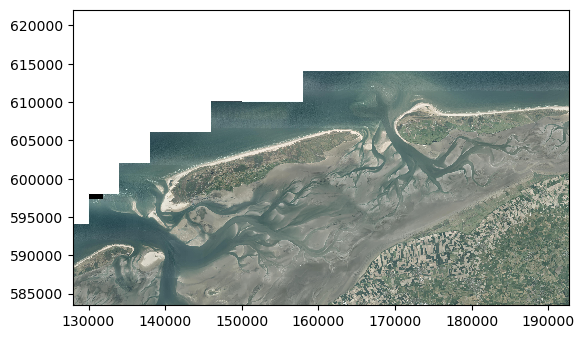

In [8]:
fig, ax = plt.subplots()
im = ax.imshow(sat, interpolation='none',
                   extent=plt_extent, clip_on=True
                  )